# Traditional Machine Learning Algorithm


In [3]:
import os 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import random
import pickle
from skimage import filters
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
dir = 'hafizTraffic1\\train'

categories = ['highdensity','lowdensity','moderatedensity']

data = []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath =os.path.join(path,img)
        trafficimg= cv2.imread(imgpath,0)
        try: 
            trafficimg= cv2.resize(trafficimg,(224,224)) 
            image= np.array(trafficimg).flatten()
            image = np.reshape(image, (224 * 224))
            image=np.array(image)/255.0

         
            data.append([image,label])    
        except Exception as e:
            pass    
            
        
print(len(data))        
    
    



2400


In [7]:
dir = 'hafizTraffic1\\test'

categories = ['highdensity','lowdensity','moderatedensity']

dataTest = []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath =os.path.join(path,img)
        trafficimg= cv2.imread(imgpath,0)
        try: 
            trafficimg= cv2.resize(trafficimg,(224,224)) 
            image= np.array(trafficimg).flatten()
            image = np.reshape(image, (224 * 224))
            image=np.array(image)/255.0
            


         
            dataTest.append([image,label])    
        except Exception as e:
            pass    
            
        
print(len(dataTest))   

600


In [8]:
dir = 'hafizTraffic1\\test'

categories = ['highdensity','lowdensity','moderatedensity']

datahigh = []



path = os.path.join(dir,'highdensity')
label = categories.index('highdensity')
    
for img in os.listdir(path):
    imgpath =os.path.join(path,img)
    trafficimg= cv2.imread(imgpath,0)
    try: 
        trafficimg= cv2.resize(trafficimg,(224,224)) 
        image= np.array(trafficimg).flatten()
        image = np.reshape(image, (224 * 224))
        image=np.array(image)/255.0
            
           
        datahigh.append([image,label])    
    except Exception as e:
         pass    
            
        

print(len(datahigh))     


200


In [9]:
dir = 'hafizTraffic1\\test'

categories = ['highdensity','lowdensity','moderatedensity']



datalow = []



path = os.path.join(dir,'lowdensity')
label = categories.index('lowdensity')
    
for img in os.listdir(path):
    imgpath =os.path.join(path,img)
    trafficimg= cv2.imread(imgpath,0)
    try: 
        trafficimg= cv2.resize(trafficimg,(224,224)) 
        image= np.array(trafficimg).flatten()
        image = np.reshape(image, (224 * 224))
        image=np.array(image)/255.0
            
           
        datalow.append([image,label])    
    except Exception as e:
         pass    
            
        

print(len(datalow))     

200


In [10]:
dir = 'hafizTraffic1\\test'

categories = ['highdensity','lowdensity','moderatedensity']

datamod =[]



path = os.path.join(dir,'moderatedensity')
label = categories.index('moderatedensity')
    
for img in os.listdir(path):
    imgpath =os.path.join(path,img)
    trafficimg= cv2.imread(imgpath,0)
    try: 
        trafficimg= cv2.resize(trafficimg,(224,224)) 
        image= np.array(trafficimg).flatten()
        image = np.reshape(image, (224 * 224))
        image=np.array(image)/255.0
            
           
        datamod.append([image,label])    
    except Exception as e:
         pass    
            
        

print(len(datamod))     

200


In [11]:
random.shuffle(data)
features =[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)

    
xtrain,ytrain= (features, labels)


#################################################################
#                          Train Model                          # 
#################################################################


modelSVM=SVC()
modelSVM.fit(xtrain,ytrain)

clf = RandomForestClassifier(min_samples_leaf=3,n_estimators=10)
modelRF=clf.fit(xtrain, ytrain)

neigh = KNeighborsClassifier(n_neighbors=3)
modelKNN=neigh.fit(xtrain, ytrain)




################################################################







In [12]:
features =[]
labels=[]

for feature,label in dataTest:
    features.append(feature)
    labels.append(label)

    
xtest,ytest= (features, labels)


In [13]:
features =[]
labels=[]

for feature,label in datahigh:
    features.append(feature)
    labels.append(label)

    
xtest_high,ytest_high= (features, labels)

In [14]:
features =[]
labels=[]

for feature,label in datalow:
    features.append(feature)
    labels.append(label)

    
xtest_low,ytest_low= (features, labels)

In [15]:
features =[]
labels=[]

for feature,label in datamod:
    features.append(feature)
    labels.append(label)

    
xtest_mod,ytest_mod= (features, labels)

# SVM

In [16]:
accuracytrainingSVM=modelSVM.score(xtrain,ytrain)

In [17]:
accuracytrainingSVM

0.8908333333333334

In [18]:
predictionSVM=modelSVM.predict (xtest)
accuracySVM= modelSVM.score(xtest,ytest)
accuracySVM

0.65

HIGH Traffic Accuracy

In [19]:
predictionSVM=modelSVM.predict (xtest_high)
accuracySVM= modelSVM.score(xtest_high,ytest_high)

In [20]:
accuracySVM

0.805

LOW

In [21]:
predictionSVM=modelSVM.predict (xtest_low)
accuracySVM= modelSVM.score(xtest_low,ytest_low)
accuracySVM

0.675

Moderate

In [22]:
predictionSVM=modelSVM.predict (xtest_mod)
accuracySVM= modelSVM.score(xtest_mod,ytest_mod)
accuracySVM

0.47

In [57]:
print('Confusion Matrix')
print(confusion_matrix(ytest, predictionSVM))
print('Classification Report')
target_names = ['highdensity', 'lowdensity', 'moderatedensity']
print(classification_report(ytest, predictionSVM, target_names=target_names))

Confusion Matrix
[[162  11  27]
 [ 31 135  34]
 [ 55  51  94]]
Classification Report
                 precision    recall  f1-score   support

    highdensity       0.65      0.81      0.72       200
     lowdensity       0.69      0.68      0.68       200
moderatedensity       0.61      0.47      0.53       200

       accuracy                           0.65       600
      macro avg       0.65      0.65      0.64       600
   weighted avg       0.65      0.65      0.64       600



# Random Forest

In [37]:
accuracytrainingRF=modelRF.score(xtrain,ytrain)
accuracytrainingRF

0.9429166666666666

In [39]:
predictionRF=modelRF.predict (xtest)
accuracyRF= modelRF.score(xtest,ytest)
accuracyRF

0.5683333333333334

High

In [40]:
predictionRF=modelRF.predict (xtest_high)
accuracyRF= modelRF.score(xtest_high,ytest_high)
accuracyRF

0.655

Low

In [41]:
predictionRF=modelRF.predict (xtest_low)
accuracyRF= modelRF.score(xtest_low,ytest_low)
accuracyRF

0.645

Moderate

In [42]:
predictionRF=modelRF.predict (xtest_mod)
accuracyRF= modelRF.score(xtest_mod,ytest_mod)
accuracyRF

0.405

In [66]:
print('Confusion Matrix')
print(confusion_matrix(ytest, predictionRF))
print('Classification Report')
target_names = ['highdensity', 'lowdensity', 'moderatedensity']
print(classification_report(ytest, predictionRF, target_names=target_names))

Confusion Matrix
[[130  23  47]
 [ 34 124  42]
 [ 65  51  84]]
Classification Report
                 precision    recall  f1-score   support

    highdensity       0.57      0.65      0.61       200
     lowdensity       0.63      0.62      0.62       200
moderatedensity       0.49      0.42      0.45       200

       accuracy                           0.56       600
      macro avg       0.56      0.56      0.56       600
   weighted avg       0.56      0.56      0.56       600



# KNN

In [43]:
accuracytrainingKNN=modelKNN.score(xtrain,ytrain)
accuracytrainingKNN


0.7408333333333333

In [67]:
predictionKNN=modelKNN.predict (xtest)
accuracyKNN= modelKNN.score(xtest,ytest)
accuracyKNN

0.48333333333333334

High

In [23]:
predictionKNN=modelKNN.predict (xtest_high)
accuracyKNN= modelKNN.score(xtest_high,ytest_high)
accuracyKNN

0.295

Low

In [30]:
predictionKNN=modelKNN.predict (xtest_low)
accuracyKNN= modelKNN.score(xtest_low,ytest_low)
accuracyKNN

0.845

Moderate

In [38]:
predictionKNN=modelKNN.predict (xtest_mod)
accuracyKNN= modelKNN.score(xtest_mod,ytest_mod)
accuracyKNN

0.31

In [68]:
print('Confusion Matrix')
print(confusion_matrix(ytest, predictionKNN))
print('Classification Report')
target_names = ['highdensity', 'lowdensity', 'moderatedensity']
print(classification_report(ytest, predictionKNN, target_names=target_names))

Confusion Matrix
[[ 59 113  28]
 [  7 169  24]
 [ 27 111  62]]
Classification Report
                 precision    recall  f1-score   support

    highdensity       0.63      0.29      0.40       200
     lowdensity       0.43      0.84      0.57       200
moderatedensity       0.54      0.31      0.39       200

       accuracy                           0.48       600
      macro avg       0.54      0.48      0.46       600
   weighted avg       0.54      0.48      0.46       600



# Support Vector Machine (SVM) 

Accuracy model is :  0.6516666666666666
prediction is :  lowdensity
Accuracy training model is :  0.8908333333333334


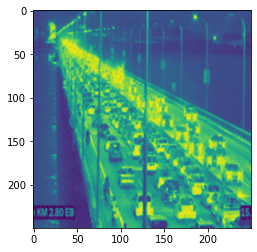

In [23]:
print('Accuracy model is : ', accuracySVM)


print('prediction is : ', categories[predictionSVM[8]])
print('Accuracy training model is : ', accuracytrainingSVM)

img=xtest[8].reshape(250,250)  
plt.imshow(img)
plt.show()

# Random Forest (RF)

Accuracy model is :  0.88
prediction is :  cloudy
Accuracy training model is :  0.9431438127090301


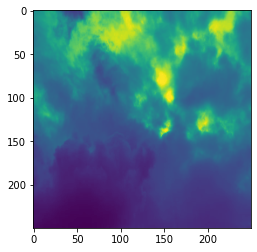

In [53]:
print('Accuracy model is : ', accuracyRF)


print('prediction is : ', categories[predictionRF[0]])
print('Accuracy training model is : ', accuracytrainingRF)

img=xtest[0].reshape(250,250)  
plt.imshow(img)
plt.show()




# K-Nearest Neighbors

Accuracy model is :  0.84
prediction is :  cloudy
Accuracy training model is :  0.8361204013377926


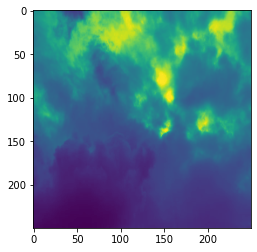

In [54]:
print('Accuracy model is : ', accuracyKNN)


print('prediction is : ', categories[predictionKNN[0]])
print('Accuracy training model is : ', accuracytrainingKNN)

img=xtest[0].reshape(250,250)  
plt.imshow(img)
plt.show()